In [1]:
#import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Hypothesis Function

It doesn't require too much to change compared to Simple Linear Regression.

![alt text](https://www.dropbox.com/s/t733qinzqspjtgm/mvlr_hypothesisfunction.png?raw=1 "Hypothesis Function")

To calculate this efficiently, we can use matrix multiplication which is used in Linear Algebra. Using this method our hypothesis function looks like this:

![alt text](https://www.dropbox.com/s/t3gwa7358r130uw/mvlr_matrixhypothesis.png?raw=1 "Matrix hypothesis")

To do this succesfully, we have to match our two matricies in size so that we can perform matrix multiplication. We acheive this by setting our first feature value ![alt text](http://www.sciweavers.org/tex2img.php?eq=x_%7B0%7D%5E%7Bi%7D%20%3D%201&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0 "x0 feature setting"). To explain more simply, the amount of columns in our training matrix must match the amount of rows in our theta vector.

### Cost Function

The cost function remains similar to the one used in simple linear regression althogh an updated one using matrix operations looks like this:

![alt text](https://www.dropbox.com/s/gxqeu7kemtcjvpk/costfunction.png?raw=1 "vectorized cost function")


In [2]:
#Cost Function
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

#### Gradient Descent

For gradient descent to work with multiple features, we have to do the same as in simple linear regression and update our theta values simultaneously over the amount of iterations and using the learning rate we supply. 

![alt text](https://www.dropbox.com/s/y6hjxzqenxz68ud/mvlrgradientdescent.png?raw=1 "gradient descent")


In [3]:
#Gradient Descent
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

#### A note on Feature Normalization

When working with multiple feature variables it will speed up gradient descent signicantly if they all are within a small range. We can achieve this using feature normalization. While there are a few ways to acheive this, a common used method uses the following method:

![alt text](https://www.dropbox.com/s/m2ylrpsz94ex51e/featurenormalization.png?raw=1 'feature normalization')

(The feature minus the mean of all the feature variables divided by the standard deviation)


In [4]:
#Plot
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [6]:
def run():
    # Import data
    data = pd.read_csv('boston.csv')

    # Extract data into X and y
    X = data[['1', '2' , '3' , '4', '5' , '6' , '7', '8' , '9' , '10', '11' , '12' , '13' ]]
    y = data['14']

    # Normalize our features
    X = (X - X.mean()) / X.std()

    # Add a 1 column to the start to allow vectorized gradient descent
    X = np.c_[np.ones(X.shape[0]), X] 

    # Set hyperparameters
    alpha = 0.01
    iterations = 1000

    # Initialize Theta Values to 0
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
    theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

    # Display cost chart
    plotChart(iterations, cost_num)

    final_cost, _ = cost_function(X, y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], cost error is 296.07345849802374


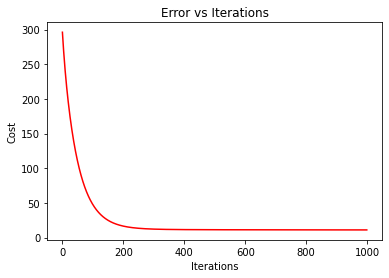

With final theta values of [22.53183355 -0.78149212  0.81211965 -0.27384797  0.74337708 -1.57713604
  2.89292113 -0.1038205  -2.7437528   1.45960806 -0.88266668 -1.95383999
  0.87320162 -3.6460385 ], cost error is 11.082708804710093


In [7]:
#To run
if __name__ == "__main__":
    run()